In [65]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\Nancy\Downloads\Data_3.csv', error_bad_lines=False)

# Remove the last column from the DataFrame
df = df.iloc[:, :-1]

# Display the DataFrame
print(df)

       FLOW  203.30.38.251  137  200  d404ff55fd4d  80711fc76001  0x0800  919  \
0      FLOW  203.30.38.251  129  193  609c9f851b00  0031466b23cf  0x0800   11   
1      FLOW  203.30.38.251  137  200  d404ff55fd4d  80711fc76001  0x0800  919   
2      FLOW  203.30.38.251  129  135  609c9f851b00  002688cd5fc7  0x0800   11   
3      FLOW  203.30.38.251  130  199  00239cd087c1  544b8cf9a7df  0x0800  919   
4      FLOW  203.30.38.251  129  135  609c9f851b00  002688cd5fc7  0x0800   11   
...     ...            ...  ...  ...           ...           ...     ...  ...   
68059  FLOW  203.30.38.251  258  199  204e71cf1b0f  ccef48570144  0x0800  537   
68060  FLOW  203.30.38.251  131  193  00a742233e9e  0031466b23cf  0x0800   43   
68061  FLOW  203.30.38.251  130  199  00239cd087c1  544b8cf9a7df  0x0800  919   
68062  FLOW  203.30.38.251  129  193  609c9f851b00  0031466b23cf  0x0800   11   
68063  FLOW  203.30.38.251  137  200  d404ff55fd4d  80711fc76001  0x0800  919   

       280   130.246.176.22

b'Skipping line 308: expected 20 fields, saw 21\nSkipping line 309: expected 20 fields, saw 21\nSkipping line 310: expected 20 fields, saw 21\nSkipping line 311: expected 20 fields, saw 21\nSkipping line 312: expected 20 fields, saw 21\nSkipping line 701: expected 20 fields, saw 21\nSkipping line 702: expected 20 fields, saw 21\nSkipping line 703: expected 20 fields, saw 21\nSkipping line 704: expected 20 fields, saw 21\nSkipping line 705: expected 20 fields, saw 21\nSkipping line 706: expected 20 fields, saw 21\nSkipping line 707: expected 20 fields, saw 21\nSkipping line 708: expected 20 fields, saw 21\nSkipping line 709: expected 20 fields, saw 21\nSkipping line 816: expected 20 fields, saw 21\nSkipping line 817: expected 20 fields, saw 21\nSkipping line 842: expected 20 fields, saw 21\nSkipping line 843: expected 20 fields, saw 21\nSkipping line 844: expected 20 fields, saw 21\nSkipping line 845: expected 20 fields, saw 21\nSkipping line 846: expected 20 fields, saw 21\nSkipping li

In [66]:
import pandas as pd
import requests
import math
from ipwhois import IPWhois
from ipwhois.exceptions import IPDefinedError
import warnings

warnings.filterwarnings('ignore')

In [67]:
col_names=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", 
           "L", "M", "N", "O", "P", "Q", "R", "S"]
df.columns=col_names
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
0,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52
1,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500
2,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94
3,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52
4,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.255.221.151,17,0x00,120,55069,26509,0x10,113,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68059,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500
68060,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420
68061,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64
68062,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245


# Top 5 Talkers. (ie sender nodes)

In [68]:
talkers = df['J'].value_counts().head(5) # source IP
listeners = df['K'].value_counts().head(5) # destination IP

# take IP address as input
#perform a lookup using PIWhois library to retrieve info 
#retrieve info about organisation associated with IP address
# retrun organisation name
def get_organization(ip_address): 
    try:
        ipwhois = IPWhois(ip_address)
        result = ipwhois.lookup_rdap()
        return result['asn_description']
    except:
        return 'Unknown'

In [69]:

print("Top 5 Talkers")

print("Rank\tIP address\t\t no. of packets\t Organization name")

for index, (ip_address, packets) in enumerate(talkers.iteritems(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")
    


Top 5 Talkers
Rank	IP address		 no. of packets	 Organization name
1	193.62.192.8	3041	JANET Jisc Services Limited, GB
2	155.69.160.32	2975	NTU-AS-AP Nanyang Technological University, SG
3	130.14.250.11	2604	NLM-GW, US
4	14.139.196.58	2452	NKN-EDGE-NW NKN EDGE Network, IN
5	140.112.8.139	2056	NTU-TW National Taiwan University, TW


# Top 5 Listeners (ie receiving node)

In [70]:

print("\nTop 5 Listeners")

print("Ranks\tIP address\t\t no. of packets\t Organization name")

for index, (ip_address, packets) in enumerate(listeners.iteritems(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")


Top 5 Listeners
Ranks	IP address		 no. of packets	 Organization name
1	103.37.198.100	3841	A-STAR-AS-AP A-STAR, SG
2	137.132.228.15	3715	NUS-AS-AP NUS Information Technology, SG
3	202.21.159.244	2446	REPUBLICPOLYTECHNIC-AS Republic Polytechnic. Multihoming AS Singapore, SG
4	192.101.107.153	2368	ESNET-AS, US
5	103.21.126.2	2056	IITB-IN Powai, IN


In [71]:
#changing column names for simplicity

In [72]:
col_names = [
        "type", "sflow_agent_address", "inputPort", "outputPort", 
    "src_MAC", "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP",
    "dst_IP", "IP_protocol", "ip_tos", "ip_ttl", "src_transport_port", 
    "dst_transport_port", "tcp_flags", "packet_size", "IP_size"]
df.columns = col_names
df

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size
0,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52
1,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500
2,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94
3,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52
4,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.255.221.151,17,0x00,120,55069,26509,0x10,113,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68059,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500
68060,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420
68061,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64
68062,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245


# Top 5 applications

In [73]:
# Group the data by the destination transport port number and count the occurrences
top_applications = df['dst_transport_port'].value_counts().head(5)

# Print the top 5 applications
print("Top 5 Applications:")
print(top_applications)



Top 5 Applications:
443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: dst_transport_port, dtype: int64


Below are the top five most frequently used application protocols using destination port numbers, along with the destination port number, number of packets, and corresponding service

In [91]:
#Group the data by destination port number
port_groups = df.groupby('dst_transport_port')
#  Count the number of packets for each destination port
packet_counts_per_port = port_groups.size()
# Find the top five most frequently occurring destination ports
top_ports = packet_counts_per_port.nlargest(5)

# Identify the corresponding application protocol and service for each top port
for port in top_ports.index:
    # Get the rows corresponding to the destination port
    port_data = df[df['dst_transport_port'] == port]
    # Group by application protocol
    protocol_groups = port_data.groupby('IP_protocol')
    # Count the number of packets for each protocol
    packet_counts_per_protocol = protocol_groups.size()
    # Find the most frequent protocol
    most_frequent_protocol = packet_counts_per_protocol.idxmax()
    # Get the corresponding service for the port
    corresponding_service = port_data['type'].iloc[0]
    
    print("Destination Port:", port)
    print("Number of Packets:", top_ports[port])
    print("Most Frequent Protocol:", most_frequent_protocol)
    print("Corresponding Service:", corresponding_service)
    print()


Destination Port: 443
Number of Packets: 13423
Most Frequent Protocol: 6
Corresponding Service: FLOW

Destination Port: 80
Number of Packets: 2647
Most Frequent Protocol: 6
Corresponding Service: FLOW

Destination Port: 52866
Number of Packets: 2068
Most Frequent Protocol: 6
Corresponding Service: FLOW

Destination Port: 45512
Number of Packets: 1356
Most Frequent Protocol: 17
Corresponding Service: FLOW

Destination Port: 56152
Number of Packets: 1341
Most Frequent Protocol: 6
Corresponding Service: FLOW



# Total traffic

In [74]:

# total traffic by summing up the packet sizes
total_traffic = df['packet_size'].sum()

print("Total traffic:", total_traffic, "bytes")

# total traffic in megabytes
total_traffic_mb = df['IP_size'].sum() * 2048 / (1024 ** 2)

#  total traffic in MB
print(f"Total traffic: {total_traffic_mb:.3f} MB")

#  total traffic in gigabytes
total_traffic_gb = total_traffic / (1024 ** 3)

print(f"Total traffic: {total_traffic_gb:.3f} GB")




Total traffic: 66198960 bytes
Total traffic: 126516.254 MB
Total traffic: 0.062 GB


# Proportion of TCP and UDP packets


Below are the proportions of TCP and UDP Packets 

In [75]:

# Count the occurrences of each IP protocol type
protocol_counts = df['IP_protocol'].value_counts()

# total number of packets
total_packets = protocol_counts.sum()

#  the proportion of TCP packets
tcp_packets = protocol_counts.get(6, 0)  # Assuming TCP is represented by protocol number 6
tcp_proportion = tcp_packets / total_packets

# the proportion of UDP packets
udp_packets = protocol_counts.get(17, 0)  # Assuming UDP is represented by protocol number 17
udp_proportion = udp_packets / total_packets

print("Proportion of TCP packets:", tcp_proportion)
print("Proportion of UDP packets:", udp_proportion)


Proportion of TCP packets: 0.8236806535025858
Proportion of UDP packets: 0.13901622002820874


Below are the number of packets of TCP and UDP Packets

In [76]:
# Count the occurrences of each IP protocol type
protocol_counts = df['IP_protocol'].value_counts()

# the number of TCP packets
tcp_packets = protocol_counts.get(6, 0)  # Assuming TCP is represented by protocol number 6

# the number of UDP packets
udp_packets = protocol_counts.get(17, 0)  # Assuming UDP is represented by protocol number 17

#  the number of TCP and UDP packets
print("Number of TCP packets:", tcp_packets)
print("Number of UDP packets:", udp_packets)

Number of TCP packets: 56063
Number of UDP packets: 9462


In [ ]:
Below are the percentages of TCP and UDP Packets

In [77]:
protocol_counts = df['IP_protocol'].value_counts()

#the total number of packets
total_packets = protocol_counts.sum()

# the proportion of TCP packets
tcp_packets = protocol_counts.get(6, 0)  # Assuming TCP is represented by protocol number 6
tcp_proportion = tcp_packets / total_packets

#  the proportion of UDP packets
udp_packets = protocol_counts.get(17, 0)  # Assuming UDP is represented by protocol number 17
udp_proportion = udp_packets / total_packets

# Convert proportions to percentages
tcp_percentage = tcp_proportion * 100
udp_percentage = udp_proportion * 100

# Print the percentages
print("Percentage of TCP packets:", tcp_percentage)
print("Percentage of UDP packets:", udp_percentage)

Percentage of TCP packets: 82.36806535025858
Percentage of UDP packets: 13.901622002820874


# Top 5 communication pair

In [79]:


print("\nTop 5 Communication pair")
# Group the DataFrame by source and destination IP addresses and count occurrences
communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")

# Sort the pairs by count in descending order and select the top 5 pairs
top_5_pairs = communication_pairs.sort_values("count", ascending=False).head(5)

# Print the top 5 communication pairs
print(top_5_pairs)



Top 5 Communication pair
              src_IP           dst_IP  count
3935    193.62.192.8   137.132.228.15   3041
787    130.14.250.11   103.37.198.100   2599
1319   14.139.196.58  192.101.107.153   2368
1451   140.112.8.139     103.21.126.2   2056
1109  137.132.228.15     193.62.192.8   1910


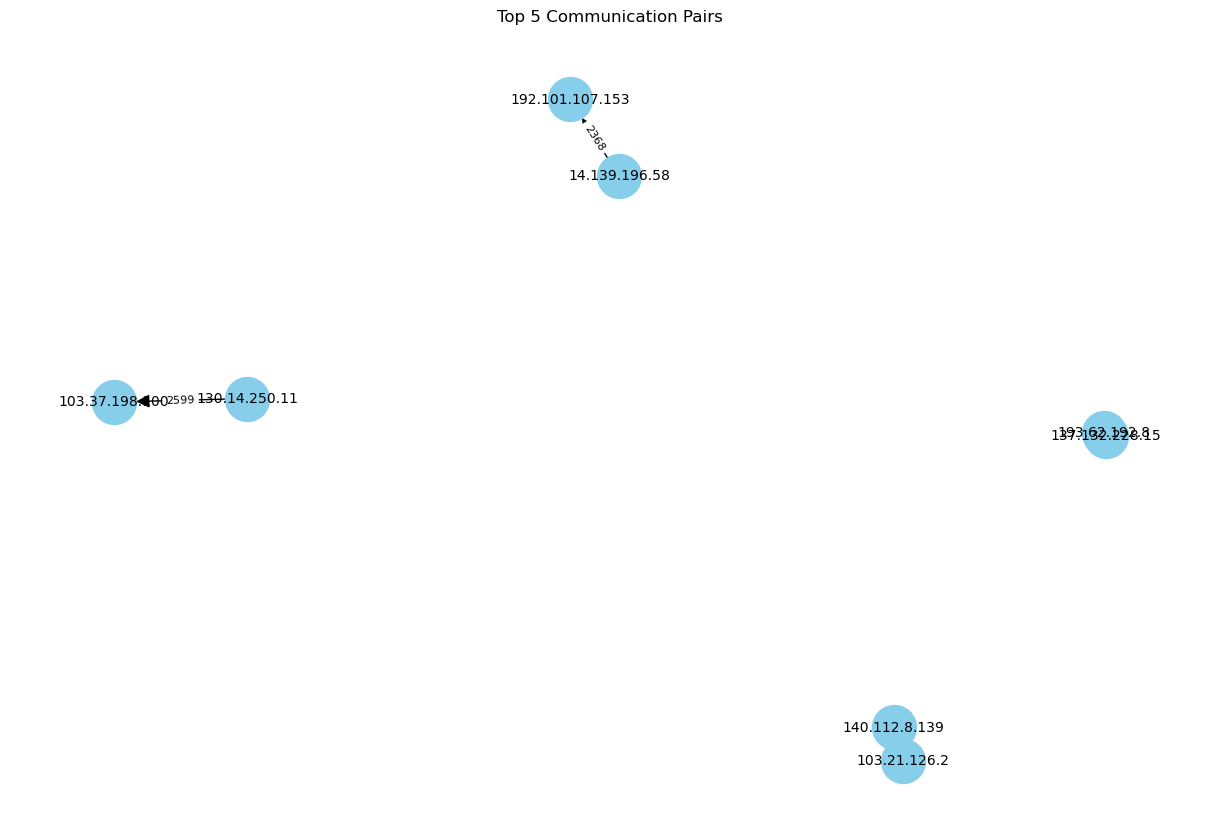

In [80]:
# visualisation using network graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Group the DataFrame by source and destination IP addresses and count occurrences
communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")

# Sort the pairs by count in descending order and select the top 5 pairs
top_5_pairs = communication_pairs.sort_values("count", ascending=False).head(5)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in top_5_pairs.iterrows():
    G.add_edge(row['src_IP'], row['dst_IP'], weight=row['count'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", arrowsize=20, font_size=10)

# Add edge labels with the count of communication occurrences
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Top 5 Communication Pairs")
plt.show()


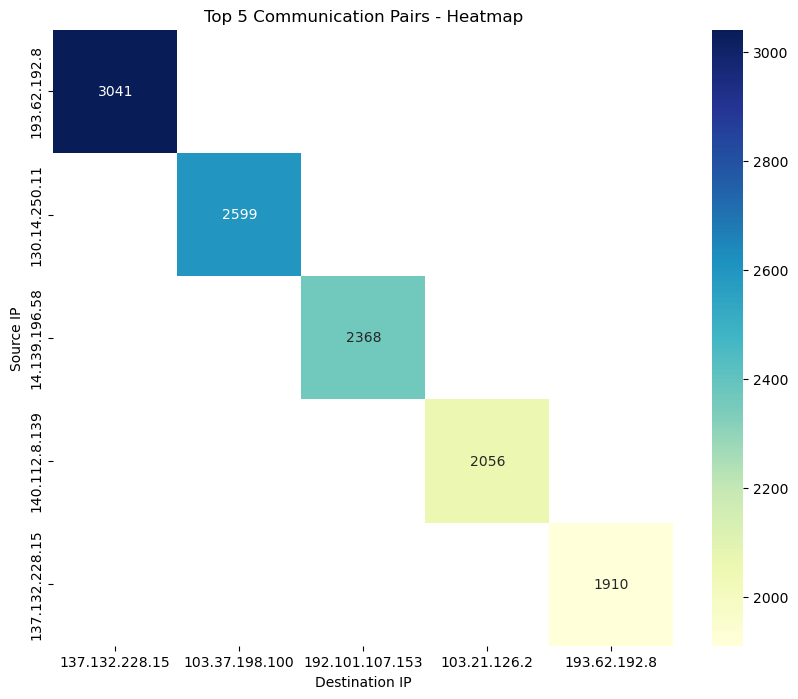

In [81]:

import seaborn as sns
import matplotlib.pyplot as plt



# Group the DataFrame by source and destination IP addresses and count occurrences
communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")

# Pivot the data to create a matrix where rows are source IPs, columns are destination IPs, and values are counts
pivot_table = communication_pairs.pivot(index='src_IP', columns='dst_IP', values='count')

# Filter the pivot table to include only the top 5 communication pairs
top_5_pairs = communication_pairs.sort_values("count", ascending=False).head(5)
top_5_src_IPs = top_5_pairs['src_IP'].tolist()
top_5_dst_IPs = top_5_pairs['dst_IP'].tolist()
filtered_pivot_table = pivot_table.loc[top_5_src_IPs, top_5_dst_IPs]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")  # Use ".0f" for float values
plt.title('Top 5 Communication Pairs - Heatmap')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()




Top 5 Communication Pairs:
              src_IP           dst_IP  count
3935    193.62.192.8   137.132.228.15   3041
787    130.14.250.11   103.37.198.100   2599
1319   14.139.196.58  192.101.107.153   2368
1451   140.112.8.139     103.21.126.2   2056
1109  137.132.228.15     193.62.192.8   1910


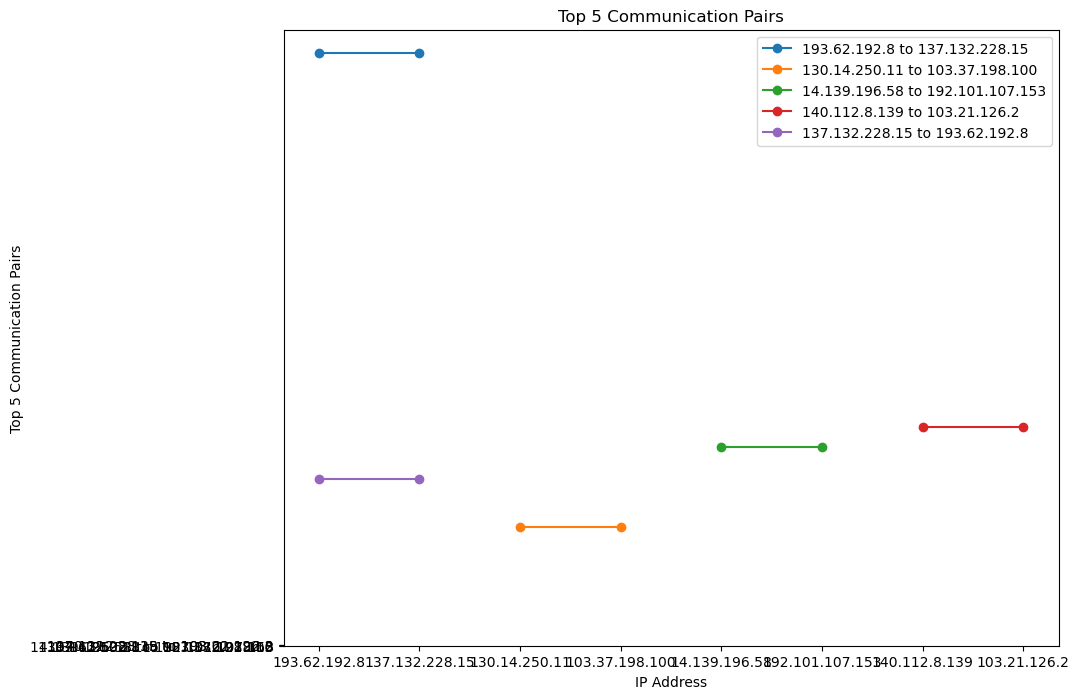

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 Communication Pairs
print("\nTop 5 Communication Pairs:")
communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")
top_5_pairs = communication_pairs.sort_values("count", ascending=False).head(5)
print(top_5_pairs)

# Visualization of Top 5 Communication Pairs
plt.figure(figsize=(10, 8))
for i, row in top_5_pairs.iterrows():
    plt.plot([row["src_IP"], row["dst_IP"]], [i, i], marker='o', 
             label=f"{row['src_IP']} to {row['dst_IP']}")
    
plt.yticks(range(len(top_5_pairs)), [f"{row['src_IP']} to {row['dst_IP']}" 
                                     for _, row in top_5_pairs.iterrows()])
plt.xlabel("IP Address")
plt.ylabel("Top 5 Communication Pairs")
plt.title("Top 5 Communication Pairs")
plt.legend()
plt.show()


# Visualizing the communication between different IP hosts

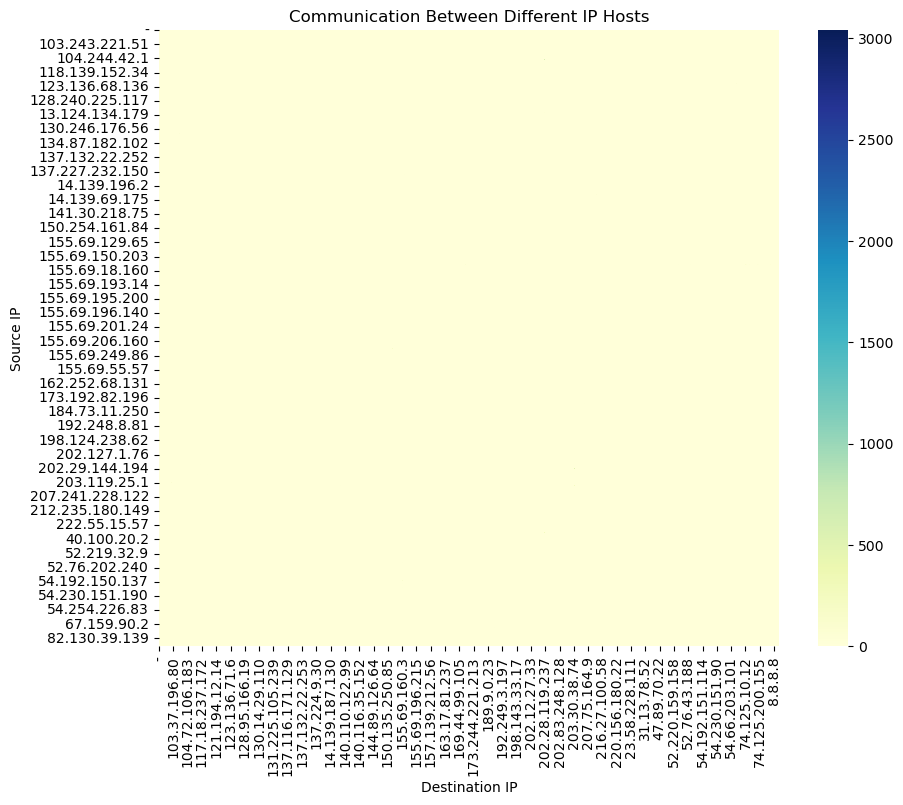

In [82]:
# visualisation using heatmap

import seaborn as sns

# Create a pivot table with source IP addresses as rows, destination IP addresses as columns, and packet count as values
pivot_table = df.pivot_table(index='src_IP', columns='dst_IP', values='packet_size', aggfunc='count', fill_value=0)

#  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Communication Between Different IP Hosts')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

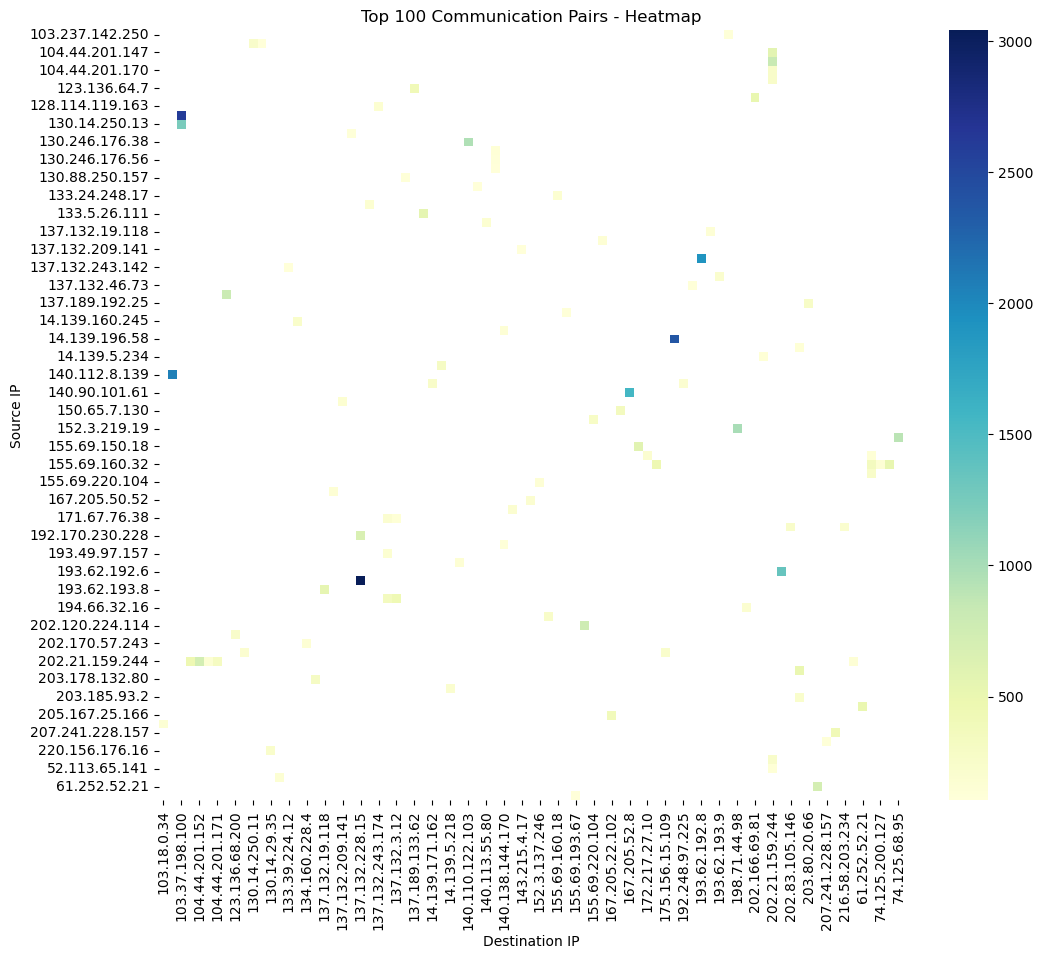

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by source and destination IP addresses and count occurrences
communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")

# Sort the pairs by count in descending order and select the top 100 pairs
top_100_pairs = communication_pairs.sort_values("count", ascending=False).head(100)

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = top_100_pairs.pivot(index='src_IP', columns='dst_IP', values='count')

#  heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Top 100 Communication Pairs - Heatmap')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()


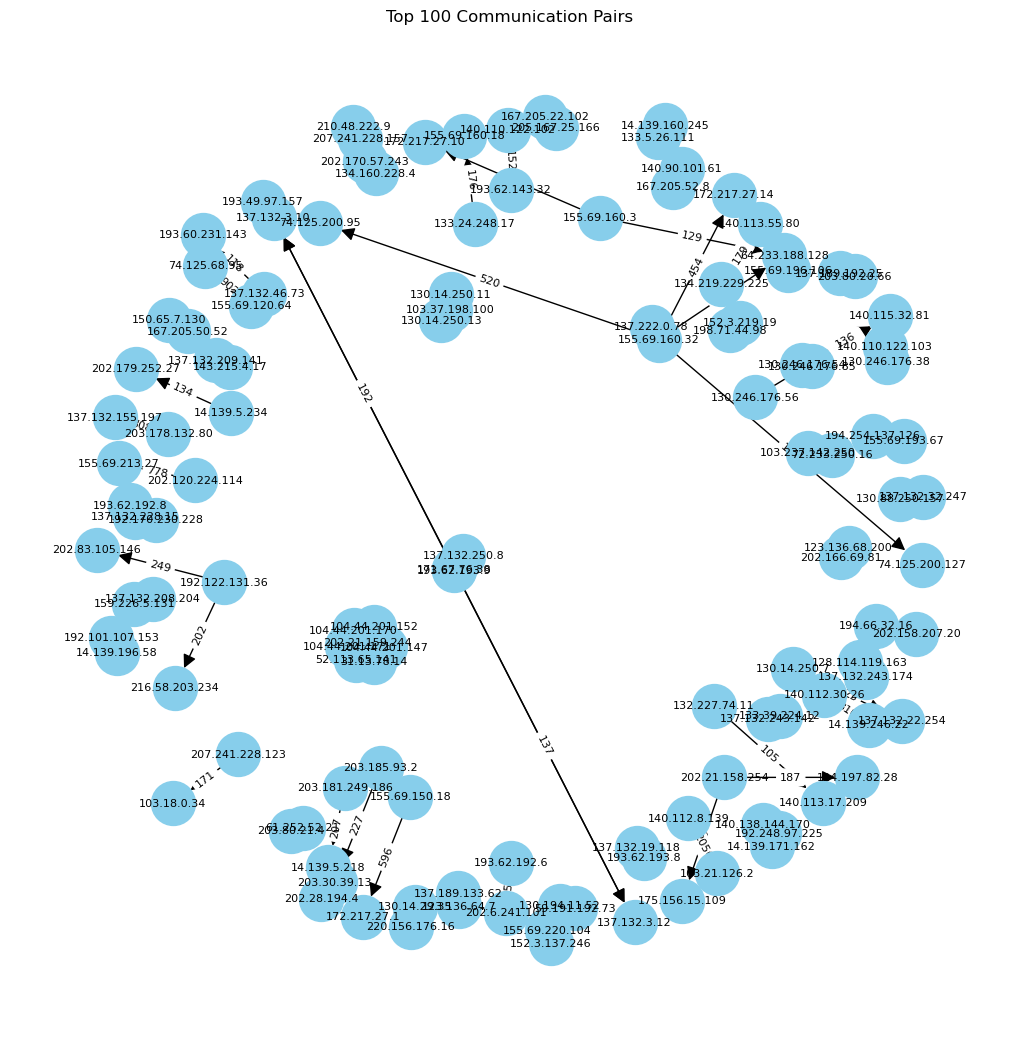

In [84]:
# visualisation using network graph

import networkx as nx
import matplotlib.pyplot as plt

communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")
top_100_pairs = communication_pairs.sort_values("count", ascending=False).head(100)

# Create a new column in the top_100_pairs DataFrame
top_100_pairs['src_IP_dst_IP'] = list(zip(top_100_pairs['src_IP'], top_100_pairs['dst_IP']))
top_pairs = top_100_pairs["src_IP_dst_IP"].tolist()

# Filter the data to include only the top 100 communication pairs
filtered_df = df[df.apply(lambda row: (row["src_IP"], row["dst_IP"]) in top_pairs, axis=1)]

# Create a directed graph from the filtered dataframe
G_filtered = nx.from_pandas_edgelist(filtered_df, "src_IP", "dst_IP", create_using=nx.DiGraph())

# Draw the filtered graph with node labels
pos_filtered = nx.spring_layout(G_filtered, seed=42)
plt.figure(figsize=(10, 10))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=1000, node_color="skyblue", arrowsize=20, font_size=8)

# Add edge labels with packet count
edge_labels_filtered = {(src, dst): filtered_df[(filtered_df["src_IP"] == src) & (filtered_df["dst_IP"] == dst)].shape[0] for src, dst in G_filtered.edges()}
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=edge_labels_filtered, font_size=8)

plt.title("Top 100 Communication Pairs")
plt.show()

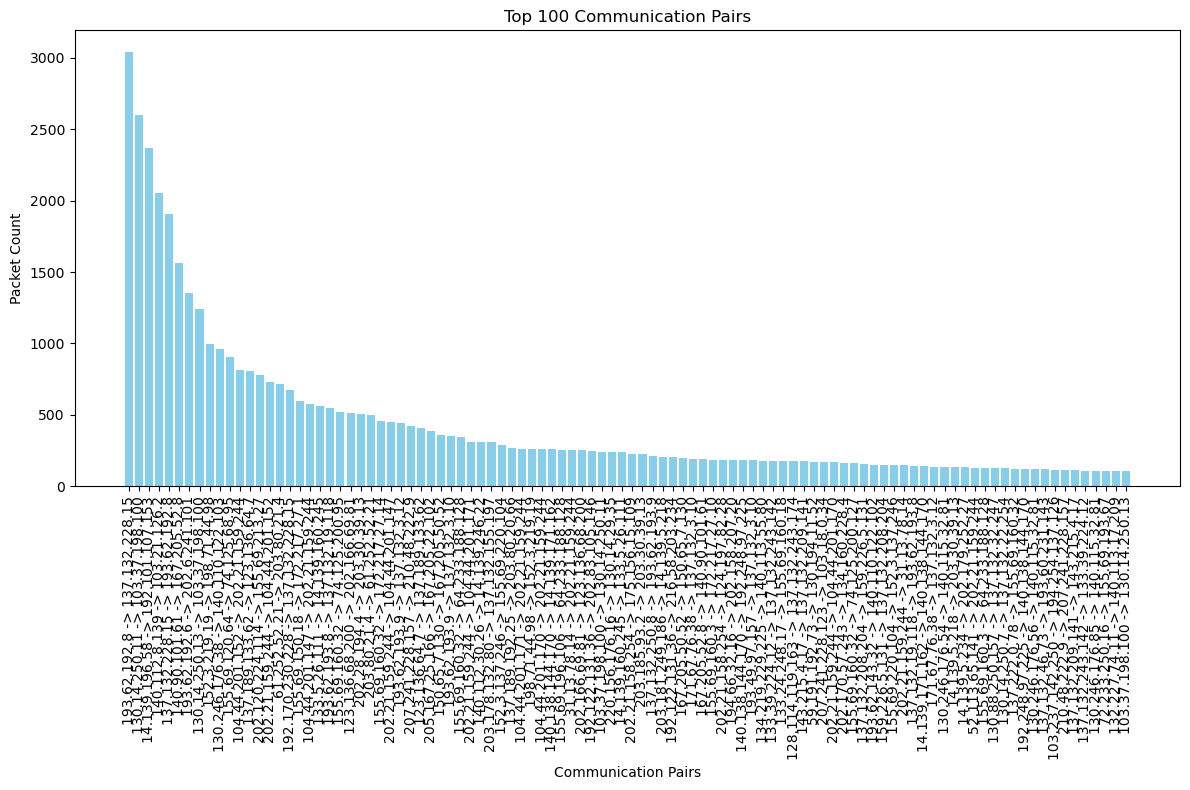

In [85]:
# visualisation using barplot
#top 100 communication pairs using  barplot
import matplotlib.pyplot as plt

# Get the top 100 communication pairs
top_100_pairs = communication_pairs.sort_values("count", ascending=False).head(100)

# Plot the top 100 communication pairs
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_100_pairs)), top_100_pairs['count'], color='skyblue')
plt.xlabel('Communication Pairs')
plt.ylabel('Packet Count')
plt.title('Top 100 Communication Pairs')
plt.xticks(range(len(top_100_pairs)), top_100_pairs['src_IP'] + ' -> ' + top_100_pairs['dst_IP'], rotation=90)
plt.tight_layout()
plt.show()


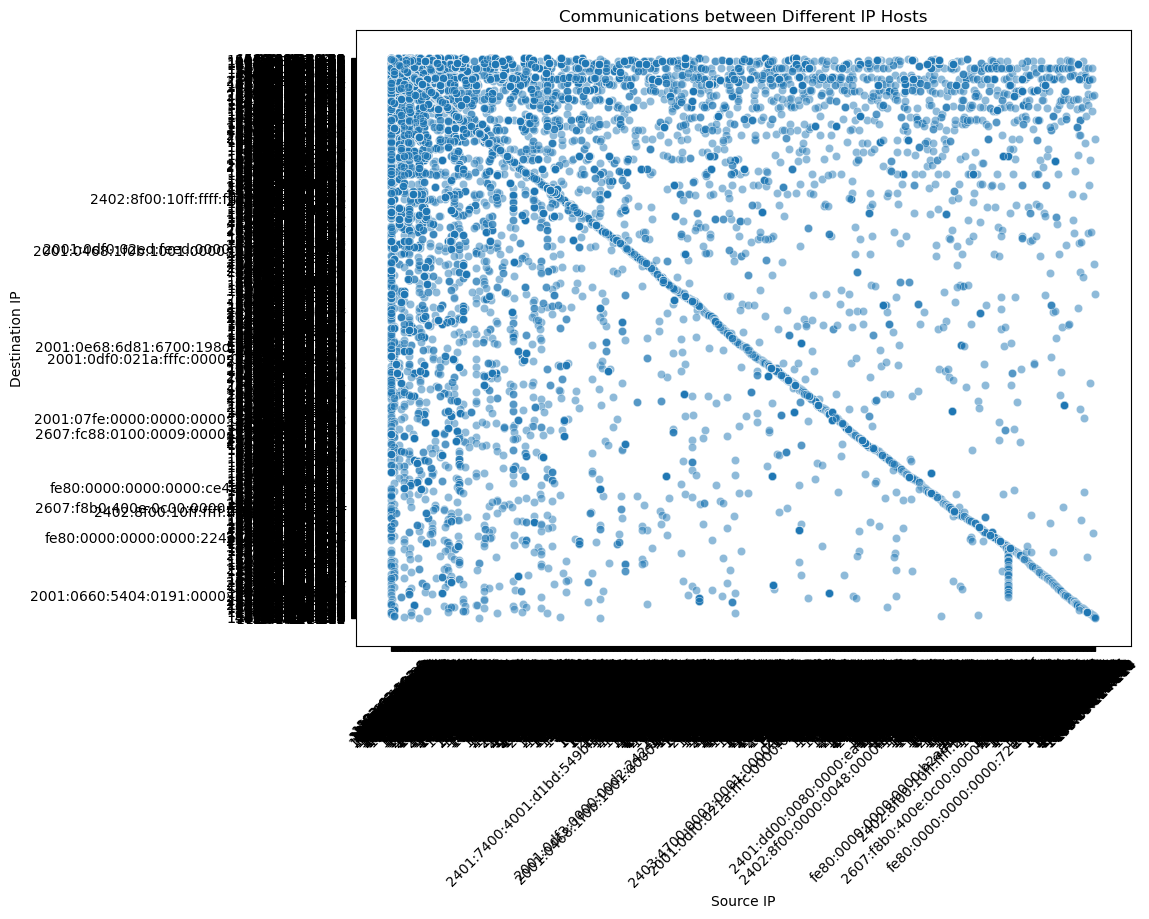

In [87]:
# visualisation using scatterplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#visualize the communication patterns between different IP hosts 
#by plotting each communication event as a point on the plot.


# Visualization of Communications between Different IP Hosts
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="src_IP", y="dst_IP", alpha=0.5)
plt.title("Communications between Different IP Hosts")
plt.xlabel("Source IP")
plt.ylabel("Destination IP")
plt.xticks(rotation=45)
plt.show()



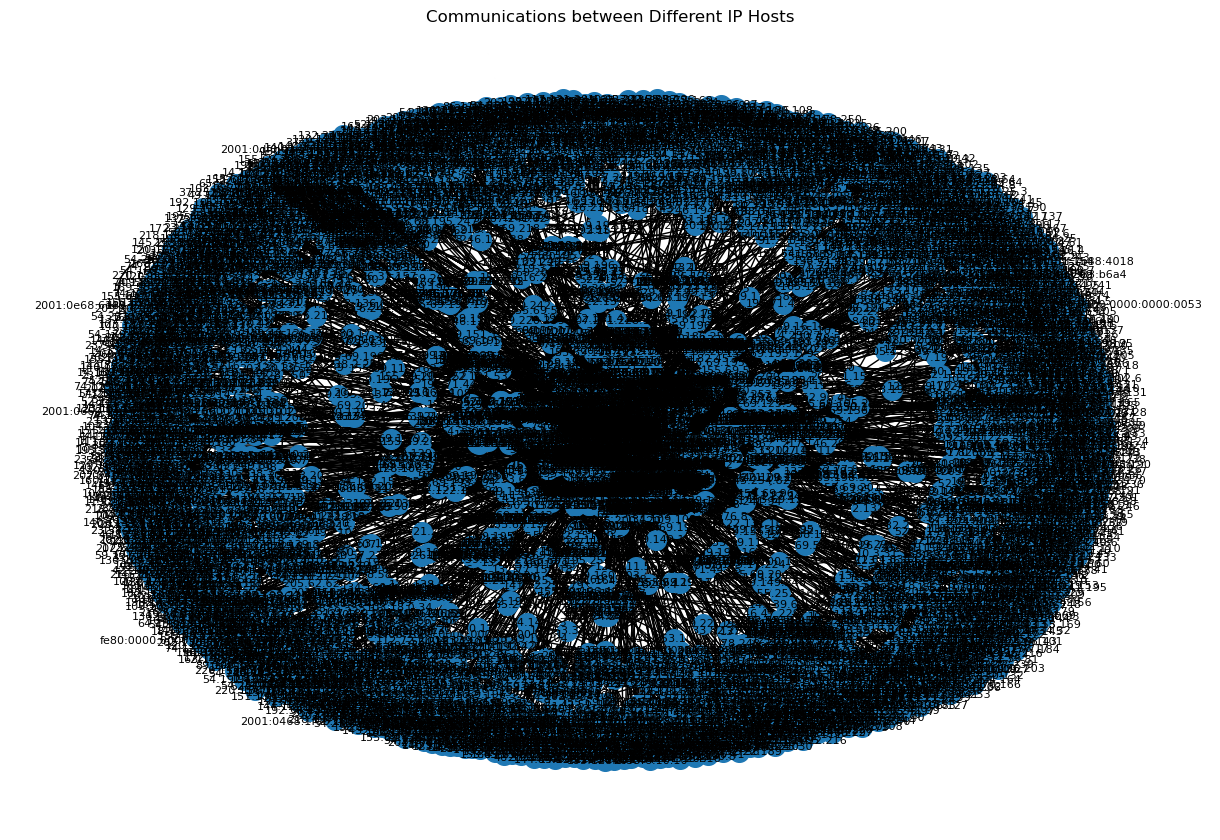

In [93]:
import networkx as nx

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'src_IP', 'dst_IP', create_using=nx.DiGraph)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=200, font_size=8)
plt.title("Communications between Different IP Hosts")
plt.show()


Additional analysis of the data and the insight of

Top 5 communication pairs and Visualization of communications between different IP hosts;(together)



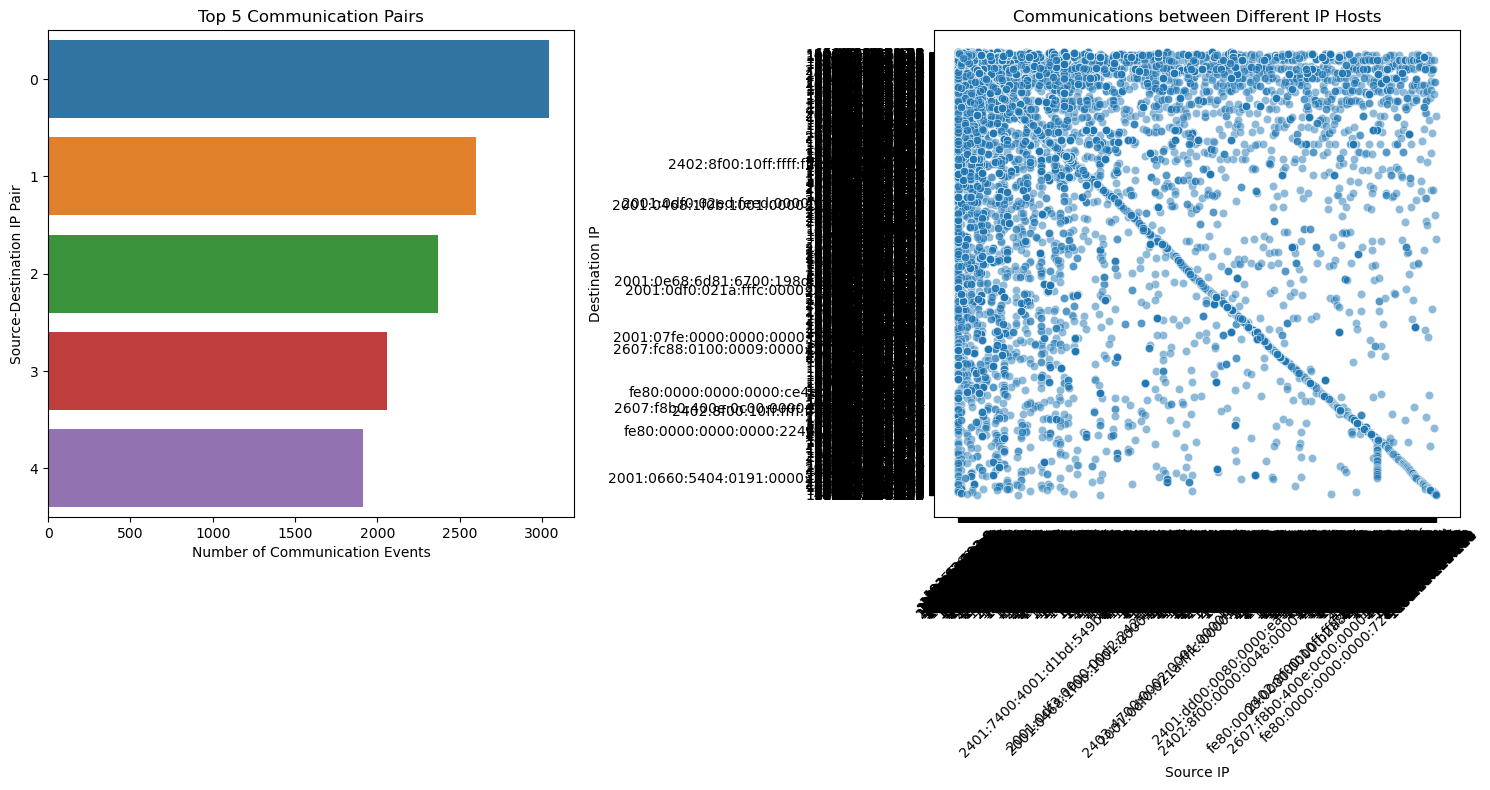

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 communication pairs
top_pairs = df.groupby(['src_IP', 'dst_IP']).size().nlargest(5).reset_index(name='count')

# Visualization of Communications between Different IP Hosts
plt.figure(figsize=(15, 8))

# Subplot 1: Top 5 communication pairs
plt.subplot(1, 2, 1)
sns.barplot(data=top_pairs, x='count', y=top_pairs.index, orient='h')
plt.title("Top 5 Communication Pairs")
plt.xlabel("Number of Communication Events")
plt.ylabel("Source-Destination IP Pair")

# Subplot 2: Visualization of communications between different IP hosts
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="src_IP", y="dst_IP", alpha=0.5)
plt.title("Communications between Different IP Hosts")
plt.xlabel("Source IP")
plt.ylabel("Destination IP")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
